In [1]:
import pandas as pd
data=pd.read_excel('/home/lz/work/pulsar_kick_velocity/Pulsar_PA15_new_parallax.xlsx')
name = list(data.iloc[:,0]) 
parallax = list(data.iloc[:,1]) 
p_err_up = list(data.iloc[:,2]) 
p_err_low = list(data.iloc[:,3]) 
alpha = list(data.iloc[:,4]) 
alpha_err=list(data.iloc[:,5]) 
beta=list(data.iloc[:,6]) 
beta_err=list(data.iloc[:,7]) 
zeta=list(data.iloc[:,8])

In [2]:
#将视差转化为距离kpc，并将list 转化为numpy
import numpy as np
distance = [1 / p for p in parallax]  # 对每个视差值计算距离
distance=np.array(distance)
parallax=np.array(parallax)
alpha = np.array(alpha)  # 将 alpha 转换为数组
beta = np.array(beta) 
zeta=np.array(zeta)
#Pulsar_PA15_new数组的2D速度
V_trans= 4.74*distance*np.sqrt(alpha**2+beta**2) #km/s
#zeta是自转-视线夹角
sin_zeta = np.sin(np.deg2rad(180-zeta))
sqrt_alpha_beta=np.sqrt(alpha**2+beta**2)
V_3D=V_trans/sin_zeta
print(V_trans)
print(V_3D)
print(zeta)
print(name)

[324.28109939 104.15048577  78.52653084 177.01584337 281.82451634]
[338.91774197 118.73789122  87.66942037 190.91773708 290.96574011]
[ 73.1  61.3  63.6  68.  104.4]
['J0139+5814', 'J0534+2200', 'J0835-4510', 'J1932+1059', 'J2157+4017']


In [3]:
dV_dp = - (4.74 * sqrt_alpha_beta) / (parallax**2 * sin_zeta) #V 对parallax的偏导数
dV_dalpha = (4.74 * alpha) / (parallax * sqrt_alpha_beta * sin_zeta) # V对 \alpha的偏导数
dV_dbeta = (4.74 * beta) / (parallax * sqrt_alpha_beta * sin_zeta)  # V对 \beta的偏导数

# 计算上限误差
sigma_V_pos = np.sqrt(
    (dV_dp * p_err_low)**2 +
    (dV_dalpha * alpha_err)**2 +
    (dV_dbeta * beta_err)**2
)

# 计算下限误差
sigma_V_neg = np.sqrt(
    (dV_dp * p_err_up)**2 +
    (dV_dalpha * alpha_err)**2 +
    (dV_dbeta * beta_err)**2
)

print("V =", V_3D, "km/s")
print("sigma_V_pos=",sigma_V_pos, "km/s")
print("sigma_V_neg=",sigma_V_neg, "km/s")

V = [338.91774197 118.73789122  87.66942037 190.91773708 290.96574011] km/s
sigma_V_pos= [36.65174097 13.45913924  5.01089069  4.82972755 62.37495288] km/s
sigma_V_neg= [36.65174097 13.45913924  5.01089069  4.82972755 62.37495288] km/s


In [4]:
data1=pd.read_excel('/home/lz/work/pulsar_kick_velocity/Pulsar_PA15_new.xlsx')
name1 = list(data1.iloc[:,0]) 
distance1=list(data1.iloc[:,1])
alpha1=list(data1.iloc[:,2])
alpha1_err=list(data1.iloc[:,3])
beta1=list(data1.iloc[:,4])
beta1_err=list(data1.iloc[:,5])
zeta1=list(data1.iloc[:,6])
zeta1_err=list(data1.iloc[:,7])

In [5]:
distance1=np.array(distance1)
distance1_err=0.5*distance1
alpha1=np.array(alpha1)
beta1=np.array(beta1)
zeta1=np.array(zeta1)
sqrt_alpha_beta1=np.sqrt(alpha1**2+beta1**2)
V_trans1= 4.74* distance1 * np.sqrt(alpha1**2+beta1**2) #km/s
sin_zeta1 = np.sin(np.deg2rad(180-zeta1))
sin_zeta1=np.abs(sin_zeta1)
V1_3D=V_trans1/sin_zeta1
print(V1_3D)
print(name1)

[186.7599706  677.55917139 285.84771938 317.92828969 196.16053211]
['J0908-1739', 'J1328-4357', 'J1913-0440', 'J2257+5909', 'J1709-4429']


In [6]:
cos_zeta1=np.cos(np.deg2rad(180-zeta1))
cos_zeta1=np.abs(cos_zeta1)

In [7]:
dV_dD1 = (4.74 * sqrt_alpha_beta1) / sin_zeta1
dV_dalpha1 = (4.74 * distance1 * alpha1) / (sqrt_alpha_beta1 * sin_zeta1)
dV_dbeta1 = (4.74 * distance1 * beta1) / (sqrt_alpha_beta1 * sin_zeta1)
dV_dzeta1 = -V_trans1/(sin_zeta1) * (cos_zeta1/sin_zeta1)  # 注意负号

sigma_V_distance=dV_dD1 * distance1
sigma_V_alpha = dV_dalpha1 * alpha1_err
sigma_V_beta = dV_dbeta1 * beta1_err
sigma_V_zeta = dV_dzeta1 * zeta1_err

# 计算总误差
sigma_V = np.sqrt(
    sigma_V_distance**2 +
    sigma_V_alpha**2 +
    sigma_V_beta**2 +
    sigma_V_zeta**2
)

print("V =", V1_3D, "km/s ±", sigma_V, "km/s")

V = [186.7599706  677.55917139 285.84771938 317.92828969 196.16053211] km/s ± [191.54997287 678.18715635 485.27065685 327.72228759 200.34713948] km/s


In [8]:
V_3D_new=np.concatenate((V_3D, V1_3D))
V_3D_err_pos=np.concatenate((sigma_V_pos,sigma_V))
V_3D_err_neg=np.concatenate((sigma_V_neg, sigma_V))
V_3D_err_pos=np.append(V_3D_err_pos,75)
V_3D_err_neg=np.append(V_3D_err_neg,57)
V_3D_new=np.append(V_3D_new, 407.0)
print(V_3D_new)
print(V_3D_err_pos)
print(V_3D_err_neg)

[338.91774197 118.73789122  87.66942037 190.91773708 290.96574011
 186.7599706  677.55917139 285.84771938 317.92828969 196.16053211
 407.        ]
[ 36.65174097  13.45913924   5.01089069   4.82972755  62.37495288
 191.54997287 678.18715635 485.27065685 327.72228759 200.34713948
  75.        ]
[ 36.65174097  13.45913924   5.01089069   4.82972755  62.37495288
 191.54997287 678.18715635 485.27065685 327.72228759 200.34713948
  57.        ]


开始处理 11 个源的速度采样...
源 1: Center=338.9 (+36.7/-36.7) -> Sampled Mean=337.6
源 2: Center=118.7 (+13.5/-13.5) -> Sampled Mean=118.2
源 3: Center=87.7 (+5.0/-5.0) -> Sampled Mean=87.5
源 4: Center=190.9 (+4.8/-4.8) -> Sampled Mean=191.0
源 5: Center=291.0 (+62.4/-62.4) -> Sampled Mean=290.3
源 6: Center=186.8 (+191.5/-191.5) -> Sampled Mean=238.6
源 7: Center=677.6 (+678.2/-678.2) -> Sampled Mean=882.1
源 8: Center=285.8 (+485.3/-485.3) -> Sampled Mean=501.1
源 9: Center=317.9 (+327.7/-327.7) -> Sampled Mean=414.4
源 10: Center=196.2 (+200.3/-200.3) -> Sampled Mean=247.6
源 11: Center=407.0 (+75.0/-57.0) -> Sampled Mean=411.9

处理完成！
最终数组形状: (11000,)
是否包含负值: False
11000


(array([1.460e+02, 1.720e+02, 1.800e+02, 1.314e+03, 8.000e+02, 4.390e+02,
        2.460e+02, 1.247e+03, 3.000e+02, 3.540e+02, 4.040e+02, 5.130e+02,
        6.850e+02, 6.400e+02, 5.510e+02, 3.670e+02, 3.260e+02, 2.750e+02,
        2.230e+02, 1.590e+02, 1.310e+02, 1.250e+02, 8.700e+01, 9.800e+01,
        7.700e+01, 6.400e+01, 7.200e+01, 6.100e+01, 5.600e+01, 4.000e+01,
        5.500e+01, 4.400e+01, 4.100e+01, 4.600e+01, 3.300e+01, 3.600e+01,
        4.700e+01, 3.200e+01, 2.800e+01, 2.200e+01, 1.800e+01, 2.900e+01,
        1.300e+01, 2.400e+01, 1.300e+01, 2.400e+01, 2.700e+01, 1.900e+01,
        1.500e+01, 9.000e+00, 1.800e+01, 1.700e+01, 1.200e+01, 2.100e+01,
        1.600e+01, 9.000e+00, 1.100e+01, 1.200e+01, 1.400e+01, 9.000e+00,
        1.200e+01, 1.400e+01, 6.000e+00, 1.400e+01, 6.000e+00, 4.000e+00,
        3.000e+00, 3.000e+00, 6.000e+00, 5.000e+00, 6.000e+00, 3.000e+00,
        2.000e+00, 4.000e+00, 6.000e+00, 3.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00, 2.000e+0

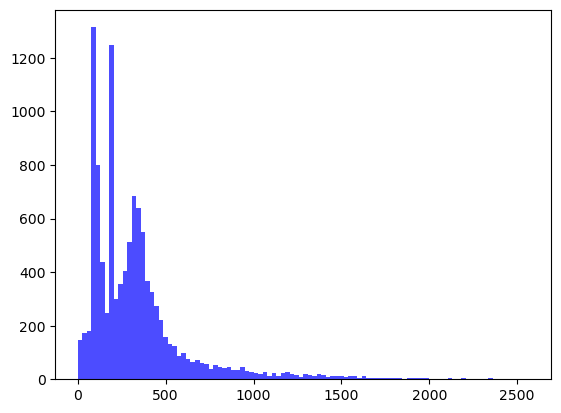

In [9]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
# ==========================================
# 1. 定义拒绝采样函数 (和之前处理 Dist 的逻辑一模一样)
# ==========================================
def sample_source(center, err_plus, err_minus, n_needed=1000, batch_size=5000):
    valid_samples = np.array([])
    # 循环直到凑够 n_needed (1000) 个
    while len(valid_samples) < n_needed:
        # 1. 每次生成一大批 (5000个)
        # 上半部分 (50%)
        upper = truncnorm.rvs(0, np.inf, loc=center, scale=err_plus, size=batch_size // 2)
        # 下半部分 (50%)
        lower = truncnorm.rvs(-np.inf, 0, loc=center, scale=err_minus, size=batch_size - (batch_size // 2))
        # 拼接
        batch = np.concatenate((upper, lower))
        # 2. 【核心】拒绝负值 (只保留 > 0)
        # 速度必须是正的，物理上没有负速率
        good_batch = batch[batch > 0]
        # 3. 加入池子
        valid_samples = np.concatenate((valid_samples, good_batch))
    
    # 4. 打乱并截取前 1000 个
    np.random.shuffle(valid_samples)
    return valid_samples[:n_needed]

print(f"开始处理 {len(V_3D_new)} 个源的速度采样...")

all_v3d_samples = []
# 遍历每个源
for i in range(len(V_3D_new)):
    # 提取当前源的参数
    v_cen = V_3D_new[i]
    v_upp = V_3D_err_pos[i]
    v_low = V_3D_err_neg[i]
    
    # 执行采样
    # 这里会自动处理负值拒绝，并保证返回严格的 1000 个
    samples = sample_source(v_cen, v_upp, v_low, n_needed=1000)
    # 存入列表
    all_v3d_samples.extend(samples)
    
    # 打印进度 (可选)
    print(f"源 {i+1}: Center={v_cen:.1f} (+{v_upp:.1f}/-{v_low:.1f}) -> Sampled Mean={np.mean(samples):.1f}")
final_v3d_flat = np.array(all_v3d_samples)

print("\n处理完成！")
print(f"最终数组形状: {final_v3d_flat.shape}") # 应该是 (12000,)
print(f"是否包含负值: {np.any(final_v3d_flat < 0)}") # 应该是 False

# 如果需要保存
np.savetxt("v3d_mc_samples_50_percent.txt", final_v3d_flat)
print(len(final_v3d_flat))
plt.hist(final_v3d_flat, bins=100, alpha=0.7, color='blue')

开始 MC 分析 (拒绝采样模式)，共 7 颗源...
目标：每颗源生成 1000 个物理上合法的样本 (Dist > 0)



[1/7] J1041-1942   Age= 23.3 | Kick: 595 ± 214 km/s (样本数: 1000)


[2/7] J1115+5030   Age= 10.5 | Kick: 590 ± 143 km/s (样本数: 1000)


[3/7] J2326+6113   Age= 10.5 | Kick: 918 ± 331 km/s (样本数: 1000)


[4/7] J1321+8323   Age= 18.0 | Kick: 1027 ± 99 km/s (样本数: 1000)


[5/7] J0152-1637   Age= 10.1 | Kick: 469 ± 125 km/s (样本数: 1000)


[6/7] J1543-0620   Age= 12.9 | Kick: 410 ± 35 km/s (样本数: 1000)


[7/7] J1840+5640   Age= 17.5 | Kick: 677 ± 5 km/s (样本数: 1000)

分析完成！
生成的有效数据点总数: 7000
数据已保存至 'birth_kick_7_aligment.txt'


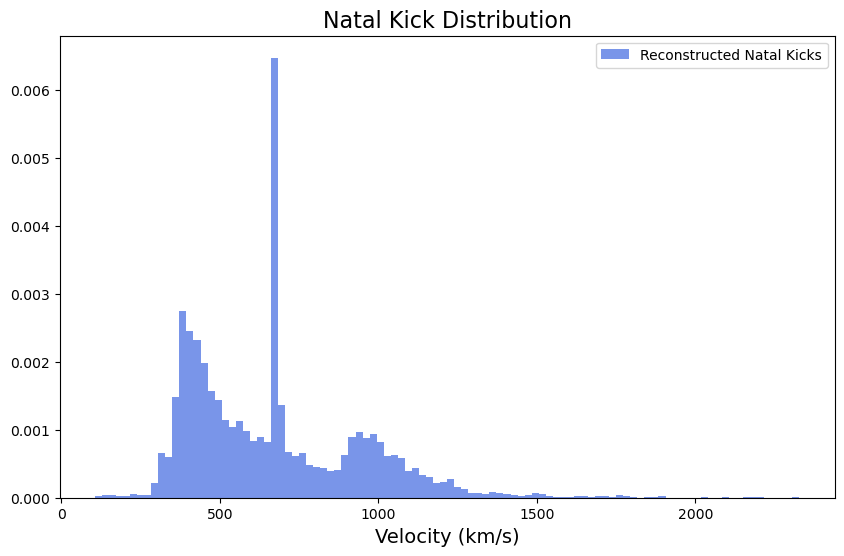

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014, vcirc
from galpy.util import conversion
import astropy.units as u

# ==========================================
# 1. 物理环境配置与辅助函数
# ==========================================
RO_KPC = 8.12
VO_KMS = 220.0
POT = MWPotential2014
N_SAMPLES = 1000  # 我们最终需要的有效样本数

def sample_dist(center, err_plus, err_minus, n_needed, oversample=3):
    """
    【核心修改】拒绝采样函数
    逻辑：为了得到 n_needed 个正值，先生成 n * oversample 个，
    扔掉负的，如果还不够就继续补，直到凑齐。
    """
    valid_samples = np.array([])
    
    # 循环直到凑齐 n_needed 个样本
    while len(valid_samples) < n_needed:
        # 1. 估算还需要生成多少个 (为了保险，多生成一些)
        n_batch = (n_needed - len(valid_samples)) * oversample
        # 至少生成 100 个，避免最后只差 1 个时效率太低
        n_batch = max(n_batch, 100)
        
        # 2. 生成这一批次的原始数据 (使用之前的双片正态逻辑)
        # 上半部分
        upper = truncnorm.rvs(0, np.inf, loc=center, scale=err_plus, size=n_batch // 2)
        # 下半部分
        lower = truncnorm.rvs(-np.inf, 0, loc=center, scale=err_minus, size=n_batch - (n_batch // 2))
        batch = np.concatenate((upper, lower))
        
        # 3. 【关键步骤】拒绝负值 (只保留 > 0 的)
        # 这里不需要设 0.01，直接要大于 0 的物理值即可
        # 如果你想更保守，也可以设 > 0.001
        good_batch = batch[batch > 0]
        
        # 4. 加入到有效池中
        valid_samples = np.concatenate((valid_samples, good_batch))
    
    # 5. 截取前 n_needed 个并打乱
    result = valid_samples[:n_needed]
    np.random.shuffle(result)
    return result

def get_kick_velocity_at_birth(orbit_obj, age_myr):
    """ 计算出生时刻的 Kick 速度 """
    time_unit_gyr = conversion.time_in_Gyr(ro=RO_KPC, vo=VO_KMS)
    ts_galpy = np.array([0, -(age_myr / 1000.0) / time_unit_gyr])
    
    # 使用 dop853
    orbit_obj.integrate(ts_galpy, POT, method='dop853')
    
    x = orbit_obj.x(ts_galpy[-1], use_physical=True)
    y = orbit_obj.y(ts_galpy[-1], use_physical=True)
    vx = orbit_obj.vx(ts_galpy[-1], use_physical=True)
    vy = orbit_obj.vy(ts_galpy[-1], use_physical=True)
    vz = orbit_obj.vz(ts_galpy[-1], use_physical=True)
    
    R_cyl = np.sqrt(x**2 + y**2)
    vc_local = vcirc(POT, R_cyl/RO_KPC) * VO_KMS
    v_lsr_x = -vc_local * (y / R_cyl)
    v_lsr_y =  vc_local * (x / R_cyl)
    
    vk_x = vx - v_lsr_x
    vk_y = vy - v_lsr_y
    vk_z = vz 
    return np.sqrt(vk_x**2 + vk_y**2 + vk_z**2)

# ==========================================
# 2. 数据读取与处理
# ==========================================
try:
    df = pd.read_excel('/home/lz/work/pulsar_kick_velocity/galpy3.xlsx')
    df.fillna(0, inplace=True)
except Exception as e:
    print(f"无法读取文件: {e}")
    df = pd.DataFrame()

print(f"开始 MC 分析 (拒绝采样模式)，共 {len(df)} 颗源...")
print(f"目标：每颗源生成 {N_SAMPLES} 个物理上合法的样本 (Dist > 0)\n")

flat_data_for_bayes = [] 

for i, row in df.iterrows():
    try:
        name = row['Name']
        ra, dec = row['RA'], row['DEC']
        
        # 距离参数
        dist_cen = row['Dist']
        dist_upp = row['Dist_upp']
        dist_low = row['Dist_low'] 
        
        # 自行参数
        pmra_cen = row['pmra']
        if 'pmra_err' in row: pmra_err = row['pmra_err']
        elif 'pm_err' in row: pmra_err = row['pm_err']
        else: raise KeyError("找不到 pmra_err")

        pmdec_cen = row['pmdec']
        if 'pmdec_err' in row: pmdec_err = row['pmdec_err']
        elif 'pmdec_error' in row: pmdec_err = row['pmdec_error']
        else: raise KeyError("找不到 pmdec_err")
        
        zeta = row['zeta']
        raw_age = row['age']
        psr_age_myr = raw_age / 1e6 if raw_age > 1000 else raw_age
        
        # --- 1. 使用拒绝采样获取距离 ---
        # 这会自动处理掉所有负值，保证 sim_dist 长度正好是 1000
        sim_dist = sample_dist(dist_cen, dist_upp, dist_low, N_SAMPLES)
        
        # --- 2. 采样自行 (对称误差，不需要拒绝，除非你觉得自行太大也不合理) ---
        sim_pmra = np.random.normal(pmra_cen, pmra_err, N_SAMPLES)
        sim_pmdec = np.random.normal(pmdec_cen, pmdec_err, N_SAMPLES)
        
        # --- 3. 速度推导 ---
        sim_vt = 4.74047 * sim_dist * np.sqrt(sim_pmra**2 + sim_pmdec**2)
        tan_zeta = np.tan(np.radians(zeta))
        if abs(tan_zeta) < 1e-4:
            sim_vr = np.zeros(N_SAMPLES)
        else:
            sim_vr = sim_vt / tan_zeta
            
        # --- 4. 建立轨道并回溯 ---
        o_mc = Orbit(
            [ra * np.ones(N_SAMPLES), 
             dec * np.ones(N_SAMPLES), 
             sim_dist, 
             sim_pmra, 
             sim_pmdec, 
             sim_vr],
            radec=True, ro=RO_KPC, vo=VO_KMS
        )
        
        # 回溯
        birth_kicks = get_kick_velocity_at_birth(o_mc, psr_age_myr)
        
        # --- 5. 数据清洗 ---
        # 虽然距离已经是正的了，但为了防范 galpy 计算异常（如极高速度），还是保留这步过滤
        valid_indices = np.isfinite(birth_kicks)
        clean_kicks = birth_kicks[valid_indices]
        clean_kicks = clean_kicks[clean_kicks < 5000] 
        
        flat_data_for_bayes.extend(clean_kicks)
        
        print(f"[{i+1}/{len(df)}] {name:<12} Age={psr_age_myr:>5.1f} | Kick: {np.mean(clean_kicks):.0f} ± {np.std(clean_kicks):.0f} km/s (样本数: {len(clean_kicks)})")

    except Exception as e:
        print(f"❌ 处理 {row.get('Name', 'Unknown')} 时出错: {e}")

# ==========================================
# 3. 结果输出
# ==========================================
final_data = np.array(flat_data_for_bayes)

if len(final_data) > 0:
    print("\n分析完成！")
    print(f"生成的有效数据点总数: {len(final_data)}")
    np.savetxt("mc_birth_kicks_for_bayes_50.txt", final_data)
    print("数据已保存至 'birth_kick_7_aligment.txt'")
    plt.figure(figsize=(10, 6))
    plt.hist(final_data, bins=100, color='royalblue', alpha=0.7, density=True, label='Reconstructed Natal Kicks')
    plt.xlabel('Velocity (km/s)', fontsize=14)
    plt.title(f'Natal Kick Distribution', fontsize=16)
    plt.legend()
    plt.show()

In [33]:
backtracking_7_50=np.loadtxt('/home/lz/work/pulsar_kick_velocity/mc_birth_kicks_for_bayes_50.txt')
samples_11_50=np.loadtxt('/home/lz/work/pulsar_kick_velocity/v3d_mc_samples_50_percent.txt')
print(len(backtracking_7_50))
print(len(samples_11_50))


7000
11000


In [35]:
V_3D_18_50_aligment=np.concatenate((backtracking_7_50, samples_11_50))
np.savetxt('/home/lz/work/pulsar_kick_velocity/V_3D_18_50_aligment.txt', V_3D_18_50_aligment, fmt='%.6f')

In [38]:
import numpy as np
from scipy.special import erf
from scipy.stats import beta as beta_dist
from scipy.stats import truncnorm
from scipy.interpolate import interp1d
import bilby
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from bilby.core.prior import Uniform
from bilby.core.sampler import run_sampler
from bilby.core.prior import LogUniform
from bilby.hyper.likelihood import HyperparameterLikelihood
from scipy import interpolate
from scipy import integrate
import random
import argparse
import os
import glob
import warnings
warnings.filterwarnings("ignore")
#####################
samples_new=np.loadtxt('/home/lz/work/pulsar_kick_velocity/V_3D_18_50_aligment.txt')
outdir='hy_outdir'
data_exp=samples_new
import sys
#import utilizes
n_samples=1000
npool=300
NN=int(len(data_exp)/n_samples)
nlive=2000
mx=n_samples
#################################
data_df=list()
ns_m=abs(data_exp)
for i in range(NN):
    re=pd.DataFrame(ns_m[i*mx:(i+1)*mx],columns=['mu'])
    data_df.append(re)
samples = data_df

def run_prior(dataset):
    return 1



In [39]:
print(min(samples_new),max(samples_new))

0.083354 2565.707816


17:29 bilby INFO    : Running for label 'u_hype_502', output will be saved to 'hy_outdir'
17:29 bilby INFO    : Analysis priors:
17:29 bilby INFO    : k=LogUniform(minimum=0.01, maximum=10, name='k', latex_label='$k$', unit=None, boundary=None)
17:29 bilby INFO    : theta=Uniform(minimum=1, maximum=400, name='theta', latex_label='$\\theta$(km/s)', unit=None, boundary=None)
17:29 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
17:29 bilby INFO    : Analysis likelihood noise evidence: 0
17:29 bilby INFO    : Single likelihood evaluation took 1.861e-04 s
17:29 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 2000, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 'rstate': None, 'queue_size': 300, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': None, 'boot

1it [00:00, ?it/s]

17:30 bilby INFO    : Written checkpoint file hy_outdir/u_hype_502_resume.pickle
17:30 bilby INFO    : Starting to close worker pool.
17:30 bilby INFO    : Finished closing worker pool.


17:30 bilby INFO    : Rejection sampling nested samples to obtain 5561 posterior samples
17:30 bilby INFO    : Sampling time: 0:00:22.652599
17:30 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:30 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:30 bilby INFO    : Summary of results:
nsamples: 5561
ln_noise_evidence:  0.000
ln_evidence: -127.930 +/-  0.050
ln_bayes_factor: -127.930 +/-  0.050



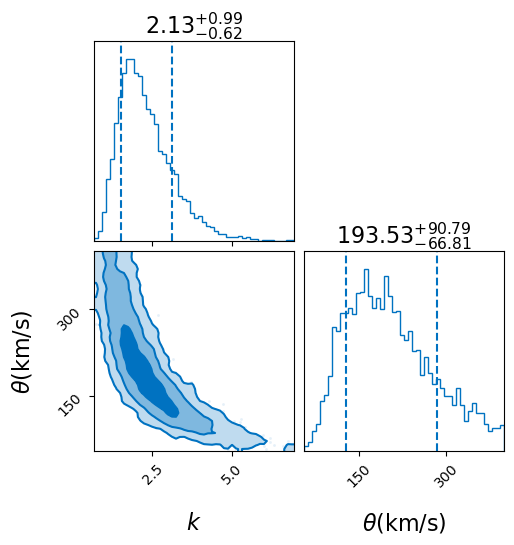

In [40]:
from scipy.special import beta
from scipy.special import gamma
def hyper_prior_gamma(dataset, k,theta):
    return (1 / (gamma(k)*theta**k)) * dataset['mu']**(k-1) *np.exp(-dataset['mu']/theta)

hp_priors_gamma = dict(k=LogUniform(0.01,10, 'k',r'$k$'),
                theta=Uniform(1, 400, 'theta',r'$\theta$(km/s)') )

hyper_prior_gamma=hyper_prior_gamma

hp_likelihood_gamma = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_gamma,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_gamma =hp_priors_gamma
# And run sampler
result_gamma = run_sampler(
    likelihood=hp_likelihood_gamma, priors=hp_priors_gamma, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_gamma.plot_corner(title_fmt='.1f')

17:30 bilby INFO    : Running for label 'u_hype_12729', output will be saved to 'hy_outdir'


<>:4: SyntaxWarning: invalid escape sequence '\m'

<>:5: SyntaxWarning: invalid escape sequence '\s'

<>:4: SyntaxWarning: invalid escape sequence '\m'

<>:5: SyntaxWarning: invalid escape sequence '\s'

/tmp/ipykernel_1250685/2974162998.py:4: SyntaxWarning: invalid escape sequence '\m'
  hp_priors_lognorm = dict(s_mu=Uniform(1, 10, 's_mu', '$\mu$'),

/tmp/ipykernel_1250685/2974162998.py:5: SyntaxWarning: invalid escape sequence '\s'
  s_sigma=LogUniform(0.01, 10, 's_sigma', '$\sigma$') )



17:30 bilby INFO    : Analysis priors:
17:30 bilby INFO    : s_mu=Uniform(minimum=1, maximum=10, name='s_mu', latex_label='$\\mu$', unit=None, boundary=None)
17:30 bilby INFO    : s_sigma=LogUniform(minimum=0.01, maximum=10, name='s_sigma', latex_label='$\\sigma$', unit=None, boundary=None)
17:30 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
17:30 bilby INFO    : Analysis likelihood noise evidence: 0
17:30 bilby INFO    : Single likelihood evaluation took 1.844e-04 s
17:30 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 2000, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 'rstate': None, 'queue_size': 300, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': None, 'bootstrap': None, 'walks': 100, 'facc': 0.2, 'slices': None, 'ncdim': None, 'blob': Fals

/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /



17:30 bilby INFO    : Generating initial points from the prior
17:30 bilby INFO    : Using the bilby-implemented ensemble rwalk sampling tracking the autocorrelation function and thinning by 2 with maximum length 500000.


1it [00:00, ?it/s]

17:31 bilby INFO    : Written checkpoint file hy_outdir/u_hype_12729_resume.pickle
17:31 bilby INFO    : Starting to close worker pool.
17:31 bilby INFO    : Finished closing worker pool.


17:31 bilby INFO    : Rejection sampling nested samples to obtain 5596 posterior samples
17:31 bilby INFO    : Sampling time: 0:00:26.225864
17:31 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:31 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:31 bilby INFO    : Summary of results:
nsamples: 5596
ln_noise_evidence:  0.000
ln_evidence: -129.891 +/-  0.061
ln_bayes_factor: -129.891 +/-  0.061



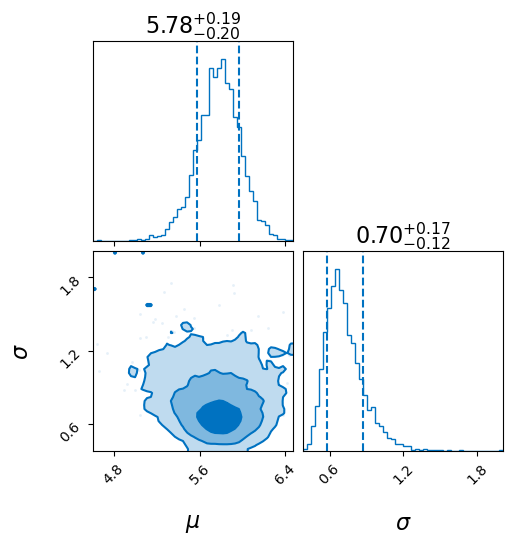

In [41]:
def hyper_prior_lognorm(dataset, s_mu, s_sigma):
    return np.exp(- (np.log(dataset['mu']) - s_mu)**2 / (2 * s_sigma**2)) /\
        (2 * np.pi * s_sigma**2)**0.5/(dataset['mu'])
hp_priors_lognorm = dict(s_mu=Uniform(1, 10, 's_mu', '$\mu$'),
                 s_sigma=LogUniform(0.01, 10, 's_sigma', '$\sigma$') )

hyper_prior_lognorm=hyper_prior_lognorm
hp_likelihood_lognorm = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_lognorm,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_lognorm =hp_priors_lognorm

# And run sampler
result_lognorm = run_sampler(
    likelihood=hp_likelihood_lognorm, priors=hp_priors_lognorm, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_lognorm.plot_corner()

17:32 bilby INFO    : Running for label 'maxwell_hype_28185', output will be saved to 'hy_outdir'
17:32 bilby INFO    : Analysis priors:
17:32 bilby INFO    : sigma=Uniform(minimum=10, maximum=2500, name='sigma', latex_label='$\\sigma$', unit=None, boundary=None)
17:32 bilby INFO    : mlo=LogUniform(minimum=0.001, maximum=400, name='mlo', latex_label='$\\rm{v^{lo}}$', unit=None, boundary=None)
17:32 bilby INFO    : mup=Uniform(minimum=400, maximum=4000, name='mup', latex_label='$\\rm{v^{up}}$', unit=None, boundary=None)
17:32 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
17:32 bilby INFO    : Analysis likelihood noise evidence: 0
17:32 bilby INFO    : Single likelihood evaluation took 3.928e-04 s
17:32 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 2000, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 'rstate': None, 'queue_size': 300, 'pool': N

/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /



17:32 bilby INFO    : Generating initial points from the prior
17:32 bilby INFO    : Using the bilby-implemented ensemble rwalk sampling tracking the autocorrelation function and thinning by 2 with maximum length 500000.


1it [00:00, ?it/s]

17:33 bilby INFO    : Written checkpoint file hy_outdir/maxwell_hype_28185_resume.pickle
17:33 bilby INFO    : Starting to close worker pool.
17:33 bilby INFO    : Finished closing worker pool.
17:33 bilby INFO    : Rejection sampling nested samples to obtain 4154 posterior samples
17:33 bilby INFO    : Sampling time: 0:00:24.039460
17:33 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 


17:33 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:33 bilby INFO    : Summary of results:
nsamples: 4154
ln_noise_evidence:  0.000
ln_evidence: -129.458 +/-  0.051
ln_bayes_factor: -129.458 +/-  0.051



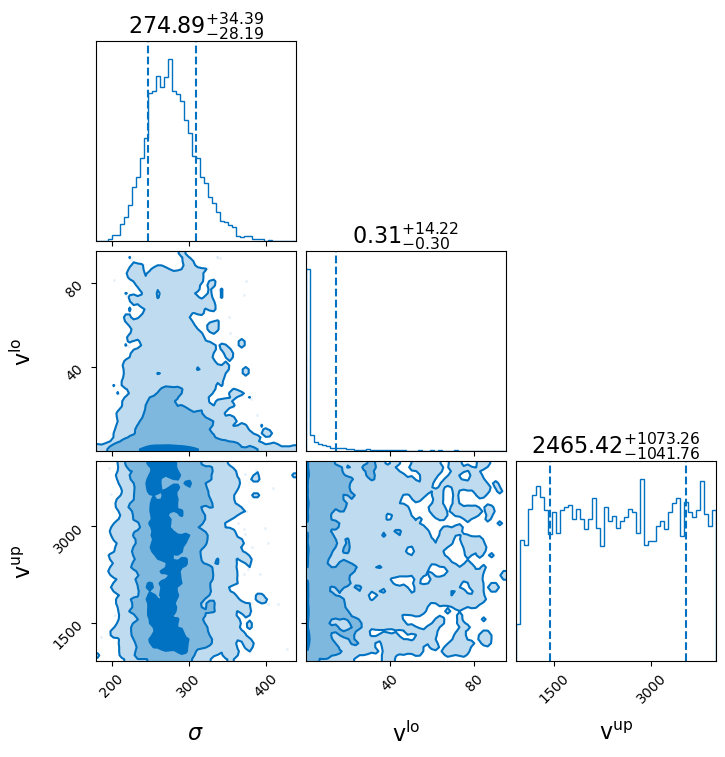

In [43]:
from scipy.stats import maxwell
from scipy.integrate import quad
def hyper_prior_maxwell(dataset,mlo,mup,sigma):
    log_likelihood = ((dataset['mu'] >= mlo) & (dataset['mu'] <= mup)) * maxwell.pdf(dataset['mu'],scale=sigma)
    return log_likelihood

hp_priors_maxwell = dict(sigma=Uniform(10, 2500, 'sigma', r'$\sigma$'),
                        mlo=LogUniform(0.001,400,'mlo', r'$\rm{v^{lo}}$'),
                        mup=Uniform(400,4000,'mup', r'$\rm{v^{up}}$')
                        )

hyper_prior_maxwell = hyper_prior_maxwell
hp_likelihood_maxwell = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_maxwell,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_maxwell = hp_priors_maxwell
result_maxwell = run_sampler(
    likelihood=hp_likelihood_maxwell, priors=hp_priors_maxwell, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='maxwell_hype_{}'.format(np.random.randint(1, 88888)),
    verbose=True, clean=True, npool=npool)

result_maxwell.plot_corner()

17:33 bilby INFO    : Running for label 'double_maxwell_hype_9619', output will be saved to 'hy_outdir'
17:33 bilby INFO    : Analysis priors:
17:33 bilby INFO    : sigma1=Uniform(minimum=10, maximum=2500, name='sigma1', latex_label='$\\sigma_1$(km/s)', unit=None, boundary=None)
17:33 bilby INFO    : sigma2=Uniform(minimum=10, maximum=2500, name='sigma2', latex_label='$\\sigma_2$(km/s)', unit=None, boundary=None)
17:33 bilby INFO    : alpha=Uniform(minimum=0.01, maximum=0.99, name='alpha', latex_label='$\\alpha$', unit=None, boundary=None)
17:33 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
17:33 bilby INFO    : Analysis likelihood noise evidence: 0
17:33 bilby INFO    : Single likelihood evaluation took 6.756e-04 s
17:33 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 2000, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 'rstate': None, 'queue_s

/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /



17:33 bilby INFO    : Generating initial points from the prior
17:33 bilby INFO    : Using the bilby-implemented ensemble rwalk sampling tracking the autocorrelation function and thinning by 2 with maximum length 500000.


1it [00:00, ?it/s]

17:35 bilby INFO    : Written checkpoint file hy_outdir/double_maxwell_hype_9619_resume.pickle
17:35 bilby INFO    : Starting to close worker pool.
17:35 bilby INFO    : Finished closing worker pool.


17:35 bilby INFO    : Rejection sampling nested samples to obtain 6067 posterior samples
17:35 bilby INFO    : Sampling time: 0:01:23.481030
17:35 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:35 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:35 bilby INFO    : Summary of results:
nsamples: 6067
ln_noise_evidence:  0.000
ln_evidence: -129.383 +/-  0.058
ln_bayes_factor: -129.383 +/-  0.058



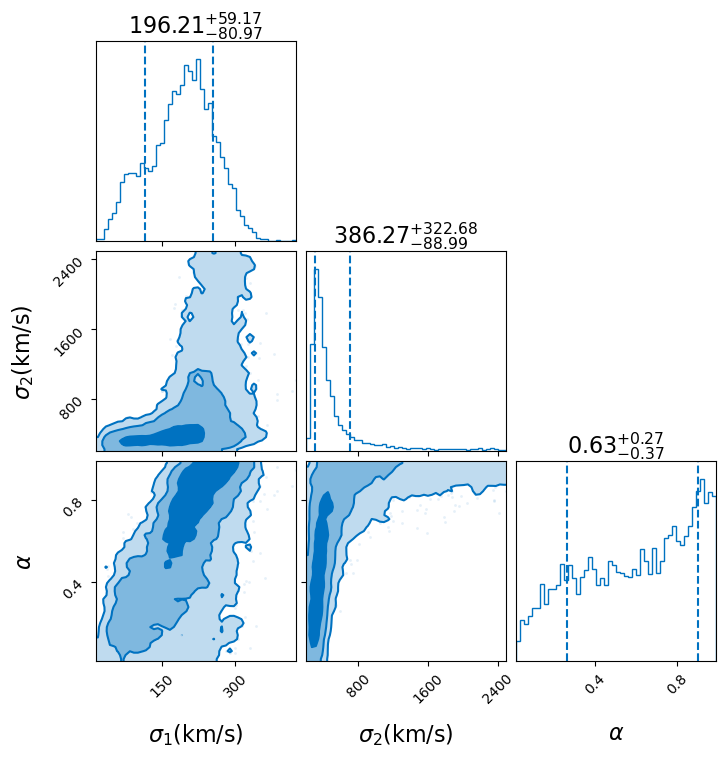

In [44]:
def hyper_prior_double_maxwell(dataset,sigma1, sigma2, alpha):
    mup=4000
    mlo=0.001
    # 数据范围限制
    sigma_constraint = (mlo < sigma1) & (sigma1 < sigma2) & (sigma2 < mup)
    valid_range = (dataset['mu'] >= mlo) & (dataset['mu'] <= mup)
    # Maxwell PDF for the two components
    pdf1 = maxwell.pdf(dataset['mu'], scale=sigma1)
    pdf2 = maxwell.pdf(dataset['mu'], scale=sigma2)
    # Combined mixture PDF
    mixture_pdf = alpha * pdf1 + (1 - alpha) * pdf2
    # Apply range restriction
    log_likelihood = sigma_constraint*valid_range * mixture_pdf
    return log_likelihood

hp_priors_double_maxwell = dict(
    sigma1=Uniform(10, 2500, 'sigma1', r'$\sigma_1$(km/s)'),
    sigma2=Uniform(10, 2500, 'sigma2', r'$\sigma_2$(km/s)'),
    alpha=Uniform(0.01, 0.99, 'alpha', r'$\alpha$')
)

hyper_prior_double_maxwell = hyper_prior_double_maxwell

hp_likelihood_double_maxwell = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_double_maxwell,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_double_maxwell = hp_priors_double_maxwell
# 运行采样器
result_2M = run_sampler(
    likelihood=hp_likelihood_double_maxwell, priors=hp_priors_double_maxwell, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='double_maxwell_hype_{}'.format(np.random.randint(1, 88888)),
    verbose=True, clean=True, npool=npool)

# 绘制角图
result_2M.plot_corner()

17:35 bilby INFO    : Running for label 'u_hype_68901', output will be saved to 'hy_outdir'
17:35 bilby INFO    : Analysis priors:
17:35 bilby INFO    : mlo=LogUniform(minimum=0.001, maximum=400, name='mlo', latex_label='$\\rm{v^l}$', unit=None, boundary=None)
17:35 bilby INFO    : mup=Uniform(minimum=400, maximum=4000, name='mup', latex_label='$\\rm{v^u}$', unit=None, boundary=None)
17:35 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
17:35 bilby INFO    : Analysis likelihood noise evidence: 0
17:35 bilby INFO    : Single likelihood evaluation took 1.588e-04 s
17:35 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 2000, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 'rstate': None, 'queue_size': 300, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 

/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /



17:36 bilby INFO    : Generating initial points from the prior
17:36 bilby INFO    : Using the bilby-implemented ensemble rwalk sampling tracking the autocorrelation function and thinning by 2 with maximum length 500000.


1it [00:00, ?it/s]

17:36 bilby INFO    : Written checkpoint file hy_outdir/u_hype_68901_resume.pickle
17:36 bilby INFO    : Starting to close worker pool.
17:36 bilby INFO    : Finished closing worker pool.


17:36 bilby INFO    : Rejection sampling nested samples to obtain 7063 posterior samples
17:36 bilby INFO    : Sampling time: 0:00:27.190949
17:36 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:36 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:36 bilby INFO    : Summary of results:
nsamples: 7063
ln_noise_evidence:  0.000
ln_evidence: -129.086 +/-  0.059
ln_bayes_factor: -129.086 +/-  0.059



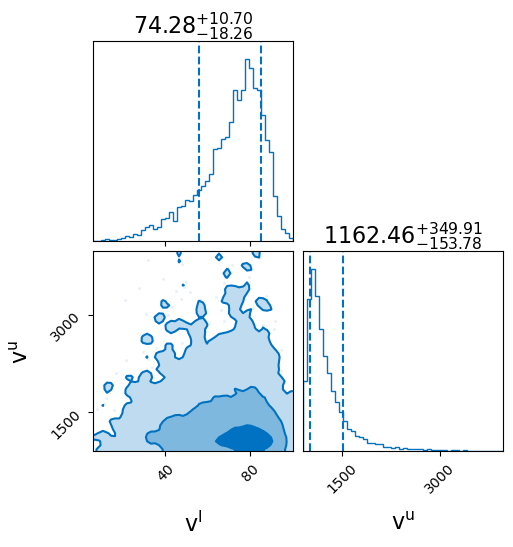

In [45]:
def hyper_prior_logu(dataset,mlo,mup):
    return (( dataset['mu'] >= mlo) & (dataset['mu'] <= mup))/( dataset['mu'] * np.log(mup / mlo) )

hp_priors_logu = dict(mlo=LogUniform(0.001, 400, 'mlo',r'$\rm{v^l}$'),
                mup=Uniform(400, 4000, 'mup',r'$\rm{v^u}$'))
#end log-uniform

hyper_prior_logu=hyper_prior_logu

hp_likelihood_logu = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_logu,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_logu =hp_priors_logu

# And run sampler
result_logu = run_sampler(
    likelihood=hp_likelihood_logu, priors=hp_priors_logu, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_logu.plot_corner()

17:37 bilby INFO    : Running for label 'u_hype_15408', output will be saved to 'hy_outdir'


<>:8: SyntaxWarning: invalid escape sequence '\m'

<>:9: SyntaxWarning: invalid escape sequence '\s'

<>:8: SyntaxWarning: invalid escape sequence '\m'

<>:9: SyntaxWarning: invalid escape sequence '\s'

/tmp/ipykernel_1250685/4283763709.py:8: SyntaxWarning: invalid escape sequence '\m'
  hp_priors_G_fixed_max_min= dict(mu=Uniform(10, 4000, 's_mu', '$\mu$'),

/tmp/ipykernel_1250685/4283763709.py:9: SyntaxWarning: invalid escape sequence '\s'
  sigma=Uniform(10, 1500, 's_sigma', '$\sigma$'))



17:37 bilby INFO    : Analysis priors:
17:37 bilby INFO    : mu=Uniform(minimum=10, maximum=4000, name='s_mu', latex_label='$\\mu$', unit=None, boundary=None)
17:37 bilby INFO    : sigma=Uniform(minimum=10, maximum=1500, name='s_sigma', latex_label='$\\sigma$', unit=None, boundary=None)
17:37 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
17:37 bilby INFO    : Analysis likelihood noise evidence: 0
17:37 bilby INFO    : Single likelihood evaluation took 3.090e-04 s
17:37 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 2000, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 'rstate': None, 'queue_size': 300, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': None, 'bootstrap': None, 'walks': 100, 'facc': 0.2, 'slices': None, 'ncdim': None, 'blob': False, '

/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /



17:37 bilby INFO    : Generating initial points from the prior
17:37 bilby INFO    : Using the bilby-implemented ensemble rwalk sampling tracking the autocorrelation function and thinning by 2 with maximum length 500000.


1it [00:00, ?it/s]

17:37 bilby INFO    : Written checkpoint file hy_outdir/u_hype_15408_resume.pickle
17:37 bilby INFO    : Starting to close worker pool.
17:37 bilby INFO    : Finished closing worker pool.


17:37 bilby INFO    : Rejection sampling nested samples to obtain 4706 posterior samples
17:37 bilby INFO    : Sampling time: 0:00:21.885287
17:37 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:37 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:37 bilby INFO    : Summary of results:
nsamples: 4706
ln_noise_evidence:  0.000
ln_evidence: -129.036 +/-  0.055
ln_bayes_factor: -129.036 +/-  0.055



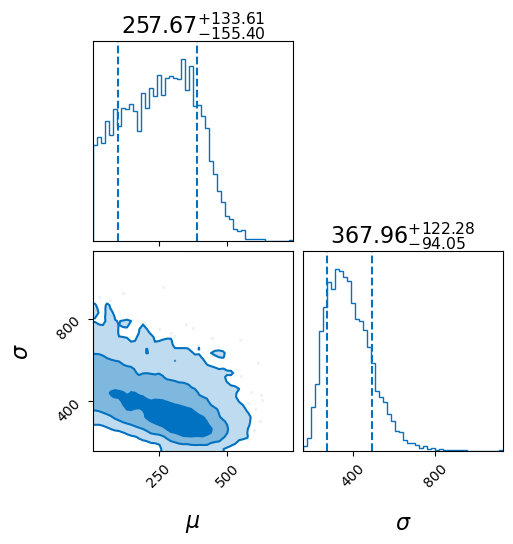

In [46]:
#begin Gaussian model with fixed upper and lower mass
def hyper_prior_G_fixed_max_min(dataset, mu, sigma):
    mup=4000
    mlo=0.001
    normalisingTerm = 0.5 * ( erf((mu-mlo)/(np.sqrt(2) * sigma)) -  erf((mu-mup)/(np.sqrt(2) * sigma)) )
    return ( ( dataset['mu'] >= mlo) & (dataset['mu'] <= mup))*((mu>mlo)&(mu<mup)) * (np.exp(- (dataset['mu'] - mu)**2 / (2 * sigma**2)) /\
        (2 * np.pi * sigma**2)**0.5) / normalisingTerm 
hp_priors_G_fixed_max_min= dict(mu=Uniform(10, 4000, 's_mu', '$\mu$'),
                 sigma=Uniform(10, 1500, 's_sigma', '$\sigma$'))
#end Gaussian with fixed upper and lower ma
#end Gaussian model 
hyper_prior_G=hyper_prior_G_fixed_max_min
hp_likelihood_G = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_G,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_G =hp_priors_G_fixed_max_min

# And run sampler
result_G = run_sampler(
    likelihood=hp_likelihood_G, priors=hp_priors_G, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_G.plot_corner()

17:38 bilby INFO    : Running for label 'u_hype_86181', output will be saved to 'hy_outdir'


<>:9: SyntaxWarning: invalid escape sequence '\m'

<>:10: SyntaxWarning: invalid escape sequence '\s'

<>:11: SyntaxWarning: invalid escape sequence '\m'

<>:12: SyntaxWarning: invalid escape sequence '\s'

<>:9: SyntaxWarning: invalid escape sequence '\m'

<>:10: SyntaxWarning: invalid escape sequence '\s'

<>:11: SyntaxWarning: invalid escape sequence '\m'

<>:12: SyntaxWarning: invalid escape sequence '\s'

/tmp/ipykernel_1250685/3059124589.py:9: SyntaxWarning: invalid escape sequence '\m'
  hp_priors_2G_fixed_max_min = dict(mu1=Uniform(10, 4000, 'mu1', '$\mu_1$'),

/tmp/ipykernel_1250685/3059124589.py:10: SyntaxWarning: invalid escape sequence '\s'
  sigma1=Uniform(10, 1500, 'sigma1', '$\sigma_1$'),

/tmp/ipykernel_1250685/3059124589.py:11: SyntaxWarning: invalid escape sequence '\m'
  mu2=Uniform(10, 4000, 'mu2', '$\mu_2$'),

/tmp/ipykernel_1250685/3059124589.py:12: SyntaxWarning: invalid escape sequence '\s'
  sigma2=Uniform(10, 1500, 'sigma2', '$\sigma_2$'),



17:38 bilby INFO    : Analysis priors:
17:38 bilby INFO    : mu1=Uniform(minimum=10, maximum=4000, name='mu1', latex_label='$\\mu_1$', unit=None, boundary=None)
17:38 bilby INFO    : sigma1=Uniform(minimum=10, maximum=1500, name='sigma1', latex_label='$\\sigma_1$', unit=None, boundary=None)
17:38 bilby INFO    : mu2=Uniform(minimum=10, maximum=4000, name='mu2', latex_label='$\\mu_2$', unit=None, boundary=None)
17:38 bilby INFO    : sigma2=Uniform(minimum=10, maximum=1500, name='sigma2', latex_label='$\\sigma_2$', unit=None, boundary=None)
17:38 bilby INFO    : alpha=Uniform(minimum=0.01, maximum=0.99, name='alpha', latex_label='$\\alpha$', unit=None, boundary=None)
17:38 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
17:38 bilby INFO    : Analysis likelihood noise evidence: 0
17:38 bilby INFO    : Single likelihood evaluation took 2.996e-04 s
17:38 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 2000, 'bound': 'live', 's

/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /



17:38 bilby INFO    : Generating initial points from the prior
17:38 bilby INFO    : Using the bilby-implemented ensemble rwalk sampling tracking the autocorrelation function and thinning by 2 with maximum length 500000.


1it [00:00, ?it/s]

17:42 bilby INFO    : Written checkpoint file hy_outdir/u_hype_86181_resume.pickle
17:42 bilby INFO    : Starting to close worker pool.
17:42 bilby INFO    : Finished closing worker pool.


17:42 bilby INFO    : Rejection sampling nested samples to obtain 6278 posterior samples
17:42 bilby INFO    : Sampling time: 0:04:07.550747
17:42 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:42 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:42 bilby INFO    : Summary of results:
nsamples: 6278
ln_noise_evidence:  0.000
ln_evidence: -130.408 +/-  0.059
ln_bayes_factor: -130.408 +/-  0.059



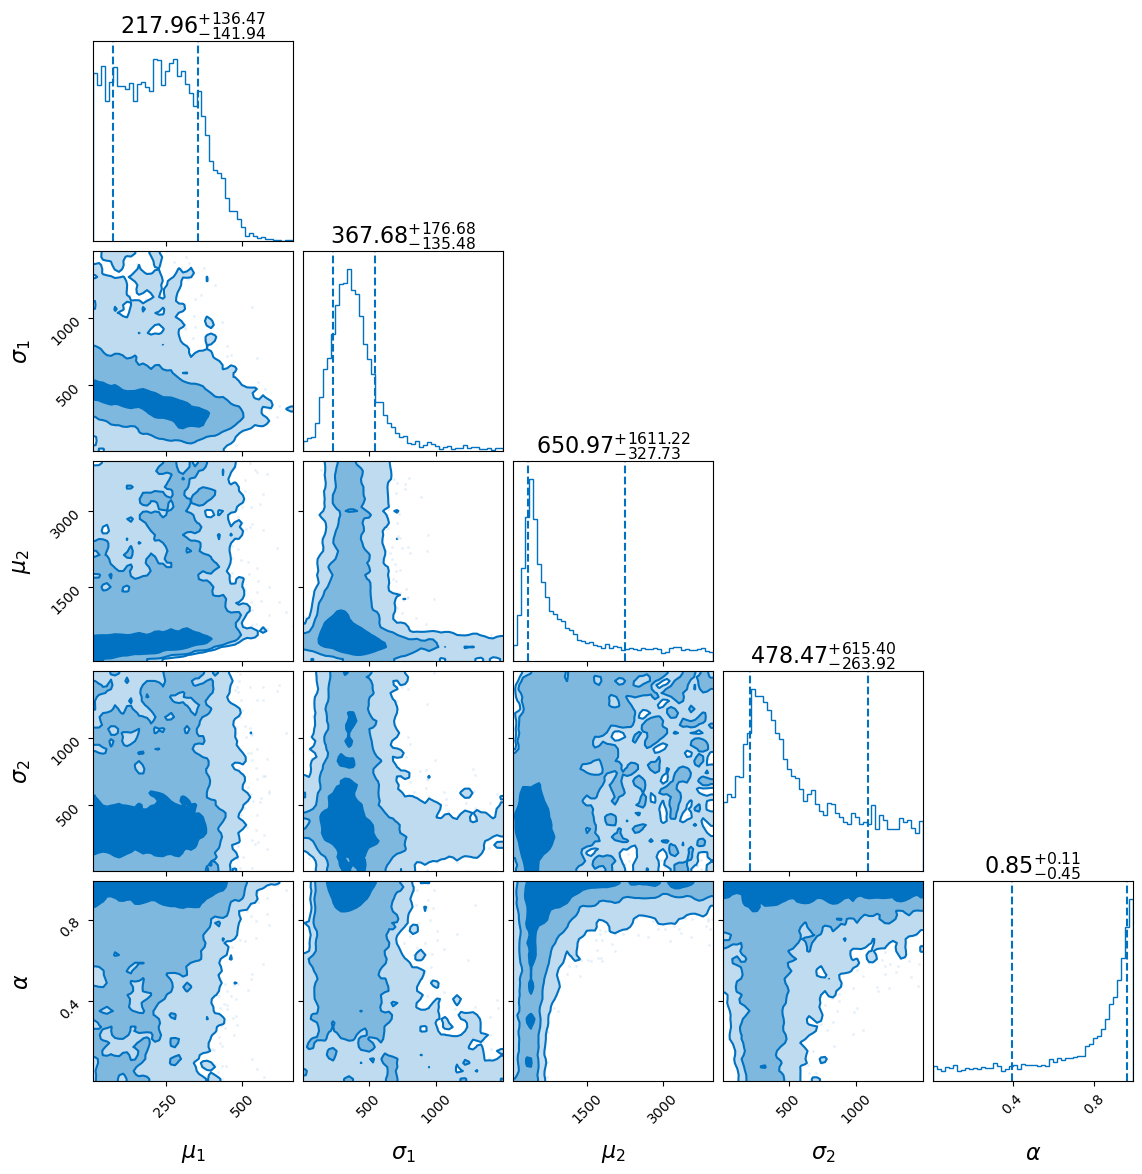

In [47]:
def hyper_prior_2G_fixed_max_min(dataset, mu1, sigma1,mu2,sigma2,alpha):
    mup=4000
    mlo=0.001
    normalisingTerm1 = 0.5 * ( erf((mu1-mlo)/(np.sqrt(2) * sigma1)) -  erf((mu1-mup)/(np.sqrt(2) * sigma1)) )
    normalisingTerm2 = 0.5 * ( erf((mu2-mlo)/(np.sqrt(2) * sigma2)) -  erf((mu2-mup)/(np.sqrt(2) * sigma2)) )
    return ((mu2 < mup ) & (mu1 > mlo) & (mu1 < mu2)  & ( dataset['mu'] >= mlo) & (dataset['mu'] <= mup)) *\
        ( (( alpha*(np.exp(- (dataset['mu'] - mu1)**2 / (2 * sigma1**2)) /(2 * np.pi * sigma1**2)**0.5)) /normalisingTerm1) +\
        (1-alpha)*( ((np.exp(- (dataset['mu'] - mu2)**2 / (2 * sigma2**2)) /(2 * np.pi * sigma2**2)**0.5) ) / normalisingTerm2) )
hp_priors_2G_fixed_max_min = dict(mu1=Uniform(10, 4000, 'mu1', '$\mu_1$'),
                 sigma1=Uniform(10, 1500, 'sigma1', '$\sigma_1$'),
                mu2=Uniform(10, 4000, 'mu2', '$\mu_2$'),
                sigma2=Uniform(10, 1500, 'sigma2', '$\sigma_2$'),
                alpha=Uniform(0.01, 0.99, 'alpha', '$\\alpha$'))
#end two-Gausssian model with fixed lower and upper mass
 
hyper_prior_2G=hyper_prior_2G_fixed_max_min
hp_likelihood_2G = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_2G,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_2G =hp_priors_2G_fixed_max_min

# And run sampler
result_2G = run_sampler(
    likelihood=hp_likelihood_2G, priors=hp_priors_2G, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_2G.plot_corner()

17:43 bilby INFO    : Running for label 'u_hype_30157', output will be saved to 'hy_outdir'


17:43 bilby INFO    : Analysis priors:
17:43 bilby INFO    : mu=Uniform(minimum=10, maximum=4000, name='mlo', latex_label='$\\rm{\\mu}$', unit=None, boundary=None)
17:43 bilby INFO    : sigma=Uniform(minimum=10, maximum=1500, name='sigma', latex_label='$\\rm{\\sigma}$', unit=None, boundary=None)
17:43 bilby INFO    : nu=LogUniform(minimum=0.01, maximum=100, name='nu', latex_label='$\\rm{\\nu}$', unit=None, boundary=None)
17:43 bilby INFO    : tau=LogUniform(minimum=2.01, maximum=30, name='tau', latex_label='$\\rm{\\tau}$', unit=None, boundary=None)
17:43 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
17:43 bilby INFO    : Analysis likelihood noise evidence: 0
17:43 bilby INFO    : Single likelihood evaluation took 3.098e-04 s
17:43 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 2000, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 'rstate': None,

1it [00:00, ?it/s]

17:50 bilby INFO    : Written checkpoint file hy_outdir/u_hype_30157_resume.pickle
17:50 bilby INFO    : Starting to close worker pool.
17:50 bilby INFO    : Finished closing worker pool.


17:50 bilby INFO    : Rejection sampling nested samples to obtain 7120 posterior samples
17:50 bilby INFO    : Sampling time: 0:06:17.964098
17:50 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:50 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:50 bilby INFO    : Summary of results:
nsamples: 7120
ln_noise_evidence:  0.000
ln_evidence: -130.989 +/-  0.071
ln_bayes_factor: -130.989 +/-  0.071



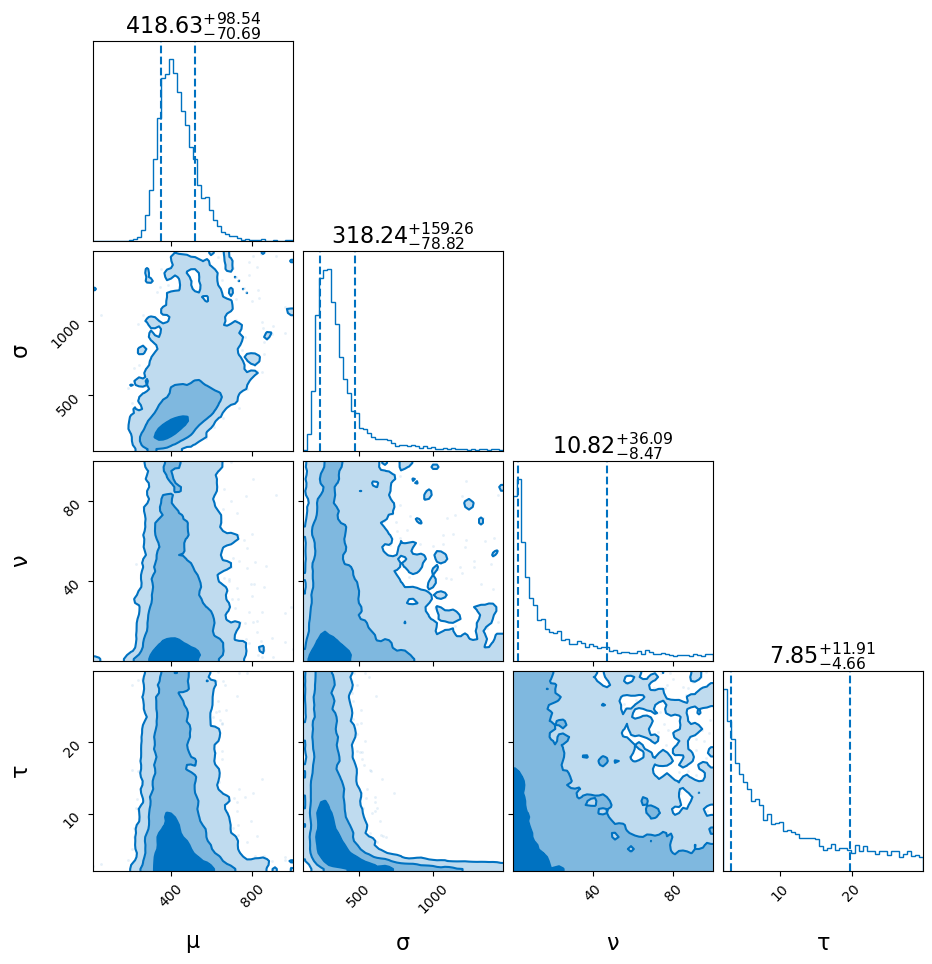

In [48]:
#begin SST
from scipy.special import beta
def hyper_prior_sst(dataset, mu,sigma,nu,tau):
        c = 2 * nu * ((1 + nu ** 2) *
                                beta(0.5, tau / 2) *
                                tau ** 0.5) ** -1
        m = ((2 * tau ** 0.5) * (nu - nu ** -1)) / (
                (tau - 1) * beta(0.5, 0.5 * tau))
        s2 = ((tau / (tau - 2)) * (
                nu ** 2 + nu ** -2 - 1) - m ** 2)
        mu_0 = mu - (sigma * m / np.sqrt(s2))
        sigma_0 = sigma / np.sqrt(s2)
        z = (dataset['mu'] - mu_0) / sigma_0
        p = np.where(dataset['mu'] < mu_0,
                     (c / sigma_0) * (1 + ((nu ** 2) * (z ** 2)) / tau) ** (
                             -(tau + 1) / 2),
                     (c / sigma_0) * (1 + (z ** 2) / ((nu ** 2) * tau)) ** (
                             -(tau + 1) / 2))
        return p

hp_priors_sst = dict(mu=Uniform(10, 4000, 'mlo',r'$\rm{\mu}$'),
                sigma=Uniform(10, 1500, 'sigma',r'$\rm{\sigma}$'),
                nu=LogUniform(0.01,100,'nu',r'$\rm{\nu}$'),
                tau=LogUniform(2.01,30,'tau',r'$\rm{\tau}$') )
#end SST

hyper_prior_sst=hyper_prior_sst
hp_likelihood_sst = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_sst,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_sst =hp_priors_sst

# And run sampler
result_sst = run_sampler(
    likelihood=hp_likelihood_sst, priors=hp_priors_sst, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_sst.plot_corner()

17:50 bilby INFO    : Running for label 'exponential_hype_85816', output will be saved to 'hy_outdir'
17:50 bilby INFO    : Analysis priors:
17:50 bilby INFO    : lam=LogUniform(minimum=0.0001, maximum=0.01, name='lam', latex_label='$\\lambda$', unit=None, boundary=None)
17:50 bilby INFO    : mlo=LogUniform(minimum=0.01, maximum=400, name='mlo', latex_label='$\\rm{v^l}$', unit=None, boundary=None)
17:50 bilby INFO    : mup=LogUniform(minimum=400, maximum=4000, name='mup', latex_label='$\\rm{v^u}$', unit=None, boundary=None)
17:50 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
17:50 bilby INFO    : Analysis likelihood noise evidence: 0
17:50 bilby INFO    : Single likelihood evaluation took 4.782e-04 s
17:50 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 2000, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 'rstate': None, 'queue_size': 300, 'pool

/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /



17:51 bilby INFO    : Generating initial points from the prior
17:51 bilby INFO    : Using the bilby-implemented ensemble rwalk sampling tracking the autocorrelation function and thinning by 2 with maximum length 500000.


1it [00:00, ?it/s]

17:51 bilby INFO    : Written checkpoint file hy_outdir/exponential_hype_85816_resume.pickle
17:51 bilby INFO    : Starting to close worker pool.
17:51 bilby INFO    : Finished closing worker pool.


17:51 bilby INFO    : Rejection sampling nested samples to obtain 4516 posterior samples
17:51 bilby INFO    : Sampling time: 0:00:19.584941
17:51 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:51 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
17:51 bilby INFO    : Summary of results:
nsamples: 4516
ln_noise_evidence:  0.000
ln_evidence: -129.161 +/-  0.038
ln_bayes_factor: -129.161 +/-  0.038



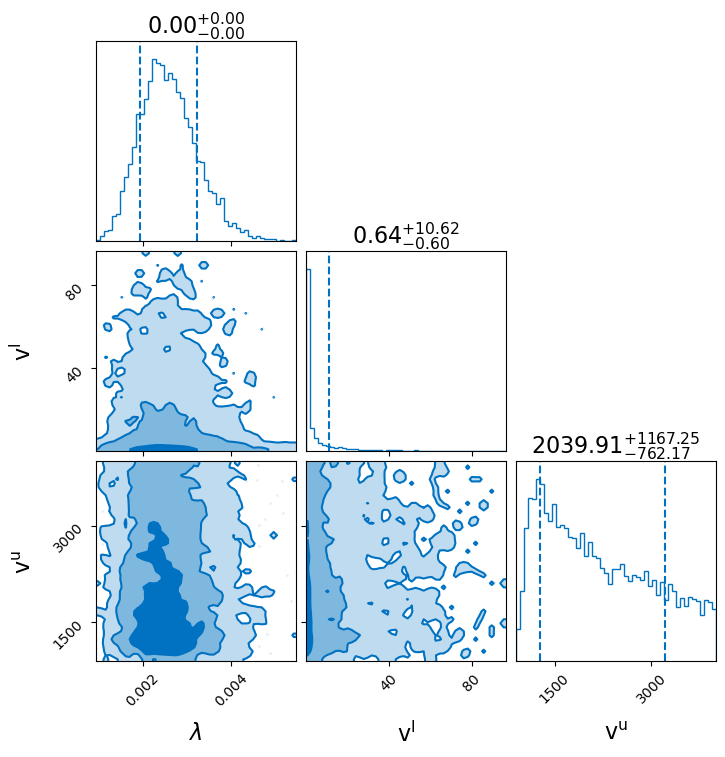

In [49]:
from scipy.stats import expon

def hyper_prior_exponential(dataset, mup, mlo, lam):
    valid_range = (dataset['mu'] >= mlo) & (dataset['mu'] <= mup)
    # Exponential PDF
    pdf_values = expon.pdf(dataset['mu'], scale=1/lam)
    # 限制范围外的概率为 0
    log_likelihood = valid_range * pdf_values
    return log_likelihood

hp_priors_exponential = dict(
    lam=LogUniform(0.0001, 0.01, 'lam', r'$\lambda$'),  # 速率参数范围
    mlo=LogUniform(0.01, 400, 'mlo', r'$\rm{v^l}$'),  # 下限范围
    mup=LogUniform(400, 4000, 'mup', r'$\rm{v^u}$')    # 上限范围
)

hyper_prior_exponential = hyper_prior_exponential

hp_likelihood_exponential = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_exponential,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_exponential = hp_priors_exponential

# 运行采样器
result_exponential = run_sampler(
    likelihood=hp_likelihood_exponential, priors=hp_priors_exponential, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='exponential_hype_{}'.format(np.random.randint(1, 88888)),
    verbose=True, clean=True, npool=npool)

# 绘制角图
result_exponential.plot_corner()

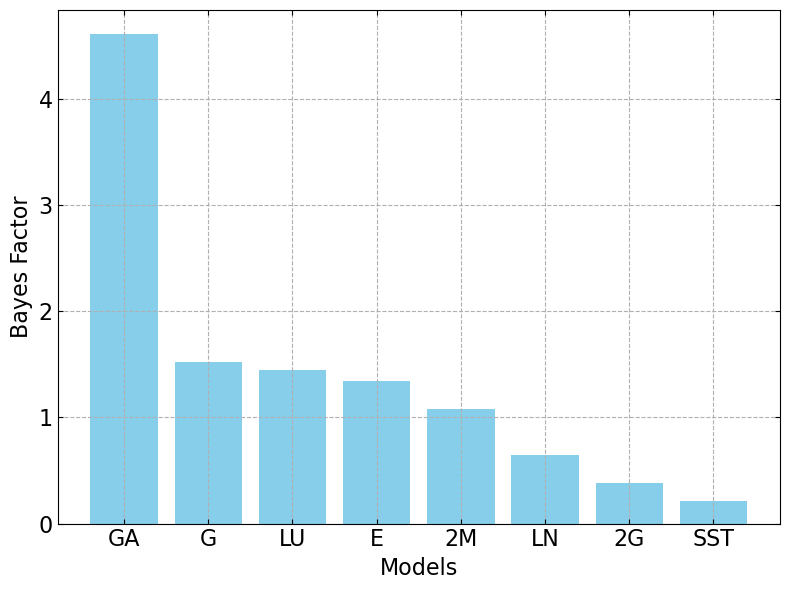

In [50]:
BF_gamma_maxwell=-127.930+129.458
BF_lognormal_maxwell=-129.891 +129.458
BF_loguniform_maxwell=-129.086+129.458
BF_gaussian_maxwell=-129.036+129.458
BF_double_gaussian_maxwell=-130.408+129.458
#BF_power_exponential=-158.387+161.920
BF_sst_maxwell=-130.989+129.458
BF_exponential_maxwell=-129.161+129.458
BF_double_maxwell_maxwell=-129.383+129.458
#------------------exp of BF----------------------
BF_gamma_maxwell_exp=np.exp(BF_gamma_maxwell)
BF_lognormal_maxwell_exp=np.exp(BF_lognormal_maxwell)
BF_loguniform_maxwell_exp=np.exp(BF_loguniform_maxwell)
BF_gaussian_maxwell_exp=np.exp(BF_gaussian_maxwell)
BF_double_gaussian_maxwell_exp=np.exp(BF_double_gaussian_maxwell)
#BF_power_exponential_exp=np.exp(BF_power_exponential)
BF_sst_maxwell_exp=np.exp(BF_sst_maxwell)
BF_exponential_maxwell_exp=np.exp(BF_exponential_maxwell)
BF_double_maxwell_maxwell_exp=np.exp(BF_double_maxwell_maxwell)
#-------------------------------------------------
from matplotlib.ticker import MultipleLocator,FuncFormatter
# Simplified labels for models
models = ["GA", "LN", "LU", "G", "2G", "SST","E","2M"]
'''
bayes_factors=[BF_gamma_exponential, BF_lognormal_exponential,BF_loguniform_exponential,
               BF_gaussian_exponential,BF_double_gaussian_exponential,
'''
bayes_factors=[BF_gamma_maxwell_exp, BF_lognormal_maxwell_exp,BF_loguniform_maxwell_exp,
               BF_gaussian_maxwell_exp,BF_double_gaussian_maxwell_exp,
               BF_sst_maxwell_exp,BF_exponential_maxwell_exp,BF_double_maxwell_maxwell_exp]
# 从大到小排序  
sorted_indices = np.argsort(bayes_factors)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_bayes_factors = [bayes_factors[i] for i in sorted_indices]

# 绘制柱状图
fig,ax=plt.subplots(figsize=(8,6))
#ax.set_xticks([-2,-1,0,1])
#ax.set_yticks([10**4,1.5*10**4,2*10**4,2.5*10**4])
plt.tick_params(top='on', right='on', which='both')
#ax.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax.yaxis.set_minor_locator(MultipleLocator(10000))
ax.tick_params(axis='both',which='both',direction='in',labelsize=16)
plt.bar(sorted_models, sorted_bayes_factors, color='skyblue',log=False)

plt.ylabel("Bayes Factor", fontsize=16)
plt.xlabel("Models", fontsize=16)
#plt.title("Bayes Factors Comparison", fontsize=14)
#plt.yscale('log')
plt.tight_layout()
#plt.yscale('log')
plt.grid(linestyle='--')
plt.savefig('Bayes_factors_comparison_50.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.show()